## Part 1 Load Sample Datasets

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
%cd ./AutoSVD++

/content/drive/MyDrive/AutoSVD++


In [4]:
!pip install result

In [5]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.2 MB/s eta 0:00:00
time: 265 µs (started: 2023-12-09 08:42:38 +00:00)


Use functions in utils/LoadDataSet.py to load the sample datasets. There are 4 datasets: set of users, set of businesses, training set of reviews, and testing set of reviews. These datasets are subsets of original Yelp's users, businesses, and reviews datasets. In this case, our sample datasets contains 5913 users, 28028 businesses, 195455 reviews in the training set, and 29565 reviews in the testing set.

In [6]:
from utils.LoadDataSet import LoadData

train_data, test_data = LoadData().loadSampleDataSet()

Number of users=5913; Number of items=28028
time: 14.2 s (started: 2023-12-09 08:42:44 +00:00)


In [7]:
train_data.shape

(5913, 28028)

time: 2.4 ms (started: 2023-12-09 08:43:00 +00:00)


In [8]:
test_data.shape

(5913, 28028)

time: 2.7 ms (started: 2023-12-09 08:43:03 +00:00)


## Part 2 Feature Extraction (CAE)

Before training AutoSVD and AutoSVD++ models, run extract_item_features.py, which run functions in the custom CAE class in utils/ContractiveAutoEncoder.py, to extract item features for training the model. In the custom CAE class, we used PyTorch to train a custom ContractiveAutoEncoder model and then used this model to extract 10 features for each business.

In [9]:
!python extract_item_features.py

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
Epoch 1, Loss: 0.0021366507280617952
Epoch 2, Loss: 0.00044787826482206583
Epoch 3, Loss: 0.0002344394160900265
Epoch 4, Loss: 0.00017806596588343382
Epoch 5, Loss: 0.00011588363850023597
Epoch 6, Loss: 0.00010078935156343505
Epoch 7, Loss: 8.275140862679109e-05
Epoch 8, Loss: 7.957188790896907e-05
Epoch 9, Loss: 7.746671326458454e-05
Epoch 10, Loss: 7.586527499370277e-05
Epoch 11, Loss: 7.596334762638435e-05
Epoch 12, Loss: 7.613931666128337e-05
Epoch 13, Loss: 7.60789480409585e-05
Epoch 14, Loss: 7.444013317581266e-05
Epoch 15, Loss: 7.661311246920377e-05
Epoch 16, Loss: 7.449455733876675e-05
Epoch 17, Loss: 7.494173041777685e-05
Epoch 18, Loss: 7.273213122971356e-05
Epoch 19, Loss: 7.471657590940595e-05
Epoch 20, Loss

In [11]:
import numpy as np

file_path_npy = 'predictions/cae_losses.npy'  # Replace with the actual path

# Load the .npy file
cae_losses = np.load(file_path_npy)

time: 2.48 ms (started: 2023-12-09 09:08:37 +00:00)


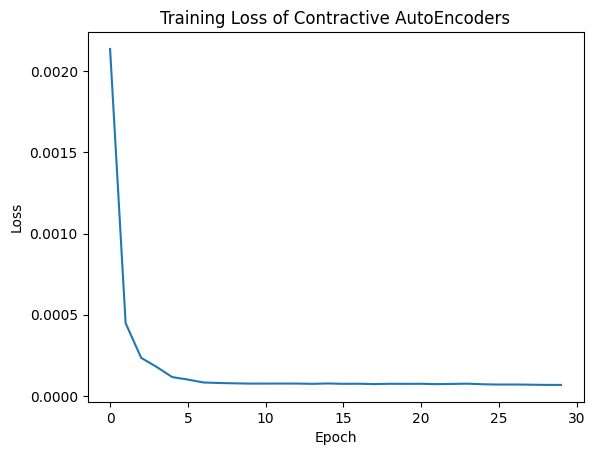

time: 183 ms (started: 2023-12-09 09:08:42 +00:00)


In [12]:
import matplotlib.pyplot as plt

# Plotting the NumPy array as a line plot
plt.plot(cae_losses)
plt.title('Training Loss of Contractive AutoEncoders')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Part 3 AutoSVD

In [31]:
file_path = 'predictions/test_matrix_pp.npy'
test_matrix_pp = np.load(file_path)

time: 1.21 s (started: 2023-12-09 10:21:29 +00:00)


In [32]:
import pickle

# Define the file path in Google Drive
file_path = 'predictions/predict_stars.pkl'  # Adjust the path and folder names

# Save the 2D array as a pickle file
with open(file_path, 'wb') as file:
    pickle.dump(test_matrix_pp, file)

time: 3.12 s (started: 2023-12-09 10:21:38 +00:00)


Then, run main_AutoSVD.py which loads the train data and test data, defines and trains a AutoSVD model, and saves the model for inference later.

In [19]:
!python main_AutoSVD.py

Number of users=5913; Number of items=28028
[epoch=1] AutoSVD RMSE = 1.05767, AutoSVD MAE = 0.82297
[epoch=2] AutoSVD RMSE = 1.04065, AutoSVD MAE = 0.80917
[epoch=3] AutoSVD RMSE = 1.03574, AutoSVD MAE = 0.80278
[epoch=4] AutoSVD RMSE = 1.03397, AutoSVD MAE = 0.79952
[epoch=5] AutoSVD RMSE = 1.03315, AutoSVD MAE = 0.79773
[epoch=6] AutoSVD RMSE = 1.03268, AutoSVD MAE = 0.79670
[epoch=7] AutoSVD RMSE = 1.03239, AutoSVD MAE = 0.79609
[epoch=8] AutoSVD RMSE = 1.03222, AutoSVD MAE = 0.79568
[epoch=9] AutoSVD RMSE = 1.03216, AutoSVD MAE = 0.79541
[epoch=10] AutoSVD RMSE = 1.03220, AutoSVD MAE = 0.79522
[epoch=11] AutoSVD RMSE = 1.03231, AutoSVD MAE = 0.79514
[epoch=12] AutoSVD RMSE = 1.03251, AutoSVD MAE = 0.79511
[epoch=13] AutoSVD RMSE = 1.03277, AutoSVD MAE = 0.79513
[epoch=14] AutoSVD RMSE = 1.03309, AutoSVD MAE = 0.79519
[epoch=15] AutoSVD RMSE = 1.03347, AutoSVD MAE = 0.79529
[epoch=16] AutoSVD RMSE = 1.03389, AutoSVD MAE = 0.79543
[epoch=17] AutoSVD RMSE = 1.03436, AutoSVD MAE = 0.79

In [20]:
import numpy as np

rmse = np.loadtxt("parameters/rmse.csv")
mae = np.loadtxt("parameters/mae.csv")

time: 4.24 ms (started: 2023-12-09 09:24:02 +00:00)


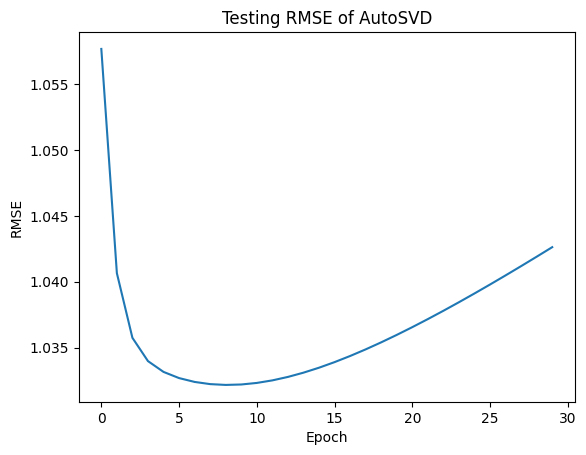

time: 148 ms (started: 2023-12-09 09:24:04 +00:00)


In [21]:
import matplotlib.pyplot as plt

# Plotting the NumPy array as a line plot
plt.plot(rmse)
plt.title('Testing RMSE of AutoSVD')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.show()

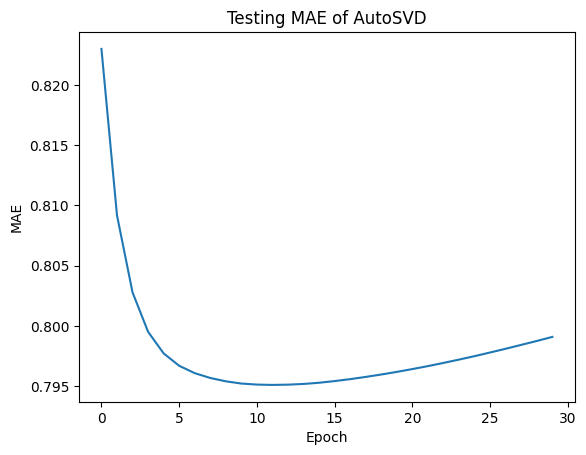

time: 161 ms (started: 2023-12-09 09:45:01 +00:00)


In [25]:
# Plotting the NumPy array as a line plot
plt.plot(mae)
plt.title('Testing MAE of AutoSVD')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.show()

## Part 4 AutoSVD++

Finally, run main_AutoSVDpp.py which loads the train data and test data, defines and trains a AutoSVDpp model, and saves the model for inference later.

In [26]:
!python main_AutoSVDpp.py

Number of users=5913; Number of items=28028
[epoch=1] AutoSVD++ RMSE = 1.07636, AutoSVD++ MAE = 0.83379
[epoch=2] AutoSVD++ RMSE = 1.05184, AutoSVD++ MAE = 0.81910
[epoch=3] AutoSVD++ RMSE = 1.04152, AutoSVD++ MAE = 0.81034
[epoch=4] AutoSVD++ RMSE = 1.03699, AutoSVD++ MAE = 0.80494
[epoch=5] AutoSVD++ RMSE = 1.03494, AutoSVD++ MAE = 0.80155
[epoch=6] AutoSVD++ RMSE = 1.03398, AutoSVD++ MAE = 0.79936
[epoch=7] AutoSVD++ RMSE = 1.03351, AutoSVD++ MAE = 0.79796
[epoch=8] AutoSVD++ RMSE = 1.03329, AutoSVD++ MAE = 0.79707
[epoch=9] AutoSVD++ RMSE = 1.03319, AutoSVD++ MAE = 0.79652
[epoch=10] AutoSVD++ RMSE = 1.03317, AutoSVD++ MAE = 0.79618
[epoch=11] AutoSVD++ RMSE = 1.03321, AutoSVD++ MAE = 0.79596
[epoch=12] AutoSVD++ RMSE = 1.03328, AutoSVD++ MAE = 0.79584
[epoch=13] AutoSVD++ RMSE = 1.03340, AutoSVD++ MAE = 0.79578
[epoch=14] AutoSVD++ RMSE = 1.03356, AutoSVD++ MAE = 0.79578
[epoch=15] AutoSVD++ RMSE = 1.03375, AutoSVD++ MAE = 0.79583
[epoch=16] AutoSVD++ RMSE = 1.03399, AutoSVD++ MAE

In [27]:
import numpy as np

rmse = np.loadtxt("parameters/rmse_pp.csv")
mae = np.loadtxt("parameters/mae_pp.csv")

time: 4.19 ms (started: 2023-12-09 10:13:49 +00:00)


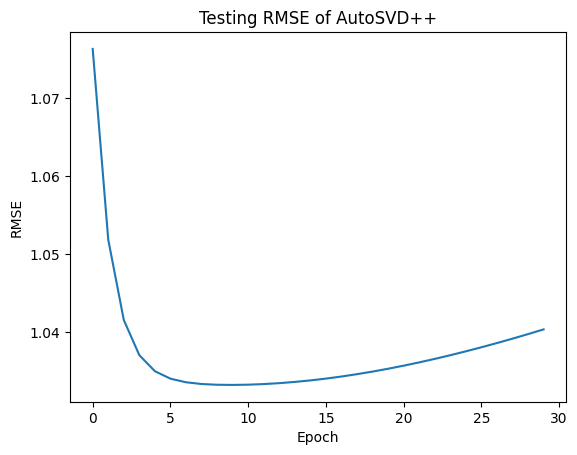

time: 157 ms (started: 2023-12-09 10:13:53 +00:00)


In [28]:
import matplotlib.pyplot as plt

# Plotting the NumPy array as a line plot
plt.plot(rmse)
plt.title('Testing RMSE of AutoSVD++')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.show()

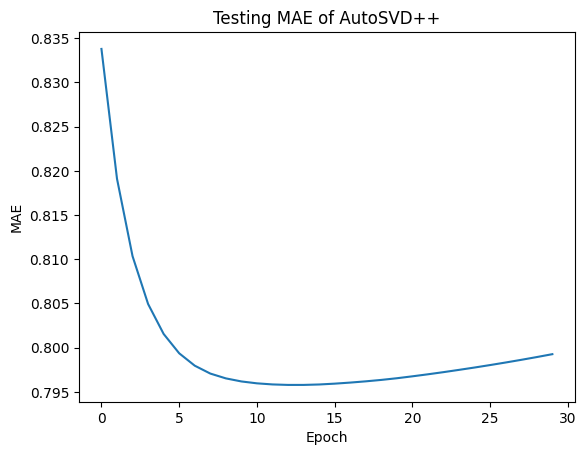

time: 167 ms (started: 2023-12-09 10:14:03 +00:00)


In [29]:
# Plotting the NumPy array as a line plot
plt.plot(mae)
plt.title('Testing MAE of AutoSVD++')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.show()

Plot the testing RMSE and MAE of AutoSVD and AutoSVD++ in one figure for comparison

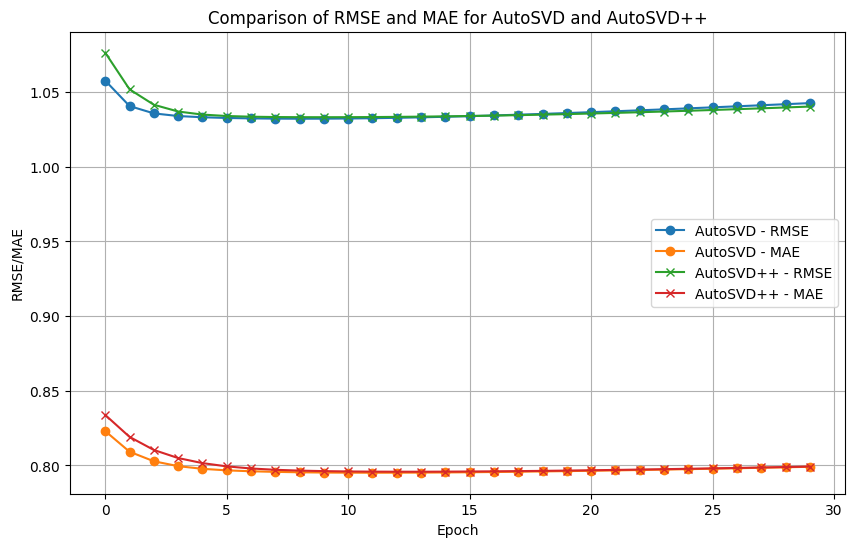

time: 226 ms (started: 2023-12-09 10:14:12 +00:00)


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV files
rmse = np.loadtxt("parameters/rmse.csv")
mae = np.loadtxt("parameters/mae.csv")
rmse_pp = np.loadtxt("parameters/rmse_pp.csv")
mae_pp = np.loadtxt("parameters/mae_pp.csv")

# Plotting the data
plt.figure(figsize=(10, 6))

# Assuming 'Epoch' is your x-axis and 'Value' is your y-axis
plt.plot(rmse, label='AutoSVD - RMSE', marker='o')
plt.plot(mae, label='AutoSVD - MAE', marker='o')
plt.plot(rmse_pp, label='AutoSVD++ - RMSE', marker='x')
plt.plot(mae_pp, label='AutoSVD++ - MAE', marker='x')

plt.xlabel('Epoch')
plt.ylabel('RMSE/MAE')
plt.title('Comparison of RMSE and MAE for AutoSVD and AutoSVD++')
plt.legend()
plt.grid(True)
plt.show()

Both RMSE and MAE of AutoSVD and AutoSVD++ are very similar, which suggests that implicit feedback does not have a great impact on Yelp restaurant recommendation. For few initial epoches, AutoSVD achieves slightly lower RMSE and MAE than AutoSVD++, but in later epoches, AutoSVD++ tends to have a slightly smaller RMSE and MAE.